# Overview
This notebook is our submission to the "case study" midterm for the "Statistical Techniques" course, Innopolis University 2024. The authors are: 

1. Ayhem Bouabid [@ayhem18](https://github.com/ayhem18)
2. Amine Trabelsi [@Amine Trabelsi](https://github.com/Amine-Trabelsi?tab=overview&from=2024-01-01&to=2024-01-31)

E-commerce is indeed one of the most prominent and rapidly growing industries. It is only normal to feel curious about the different factors that affect

# Environment set up 
Please make sure to activate a python Environment before running the cell below !!

Please comment the command depending on the operating system

In [ ]:
# clone the repository
! git clone # add the repository url after being made public...
# set up the environment

# for windowns
! pip install -e ./src

# for linux
# ! pip install -e .\src

## Important Note: 
Most of the code was written in seperate python scripts 
1. to avoid creating an extremely lengthy notebook 
2. focus on our comments and insights

# Direction 1: Product Popularity 
The first direction is to analyze the product popularity trying to discover any underlying patterns and developping certain hypotheses concerning the products popularity. 

## EDA: Products from a popularity perspective

In [ ]:
import src.products_analysis as pa
order_items_df = pa.read_item_order_df()
order_items_df.head()

After reading the data, we can know determine the number of times each product was ordered / purchased

In [ ]:
order_items_count = pa.prepare_item_orders(order_items_df=order_items_df)
order_items_count.head()

In [ ]:
order_items_count.tail()

As we can see now, with simple data aggregation techniques, we now have the number of times each product was purchased as well as its popularity ranking: the "count" and "rank" columns respectively.

Let's investigate the product popularity further

In [ ]:
import src.products_analysis as pd
import importlib
importlib.reload(pa)
qx, qy = pa.display_product_orders_skewness(order_item_count=order_items_count, figsize=(20, 10))

OH ! who would expect such a skewed distribution of products. The plot on the above cell demonstrates that a small fraction of products occupy the majority of the market share.

Let's get the exact numbers !!

In [ ]:
# the number of unique products
import numpy as np
num_unique_products = len(np.unique(order_items_count['product_id']))
for x, y in zip(qx, qy):
    print(f"the {x} most popular products (out of {num_unique_products} products) occupy { round(y* 100, 2)} % of the market share")

## Decision:
Given the extreme skewness of the products / orders data, we will focus only on the most popular $5\%$ of products. (which occupy around 42\% of the total orders)

In [ ]:
# filter the orders to keep only the top products
top_order_item_df = pa.filter_order_item_csv_top_products(order_item_count=order_items_count, quantile_rank=qx[1])

In [ ]:
importlib.reload(pa)
# read the products dataframe (the function translates some of the text from Portunguese to English, so it might take few seconds...)
products_df = pa.read_products_df()
# filter the products themselves
top_products_df = pa.prepare_products_df(top_products_order_item_df=top_order_item_df, products_df=products_df)

## EDA: products from features perspective

In [ ]:
top_products_df.head()

As we can see we have 7 features associated with each product: 
1. product id 
2. product category
3. the length of the product name 
4. the length product description  
5. product number of photos
6. product weight
7. 'count' : added previously, the number of times the product was ordered

The most promising features are: 
* product category name
* product_photos_qty

### Product

In [ ]:
# let's display the
importlib.reload(pa)
pa.display_product_category_distribution(top_products_df)

Although the distribution is relatively skewed, it is not as skewed as the orders distribution. We can see that "bed", "beauty" and "computer" products are the most popular categories. 

Nevertheless, we have a relatively large number of categories with high number of products as well: 

8 categories with each occupying at least $5\%$ of the products. Analysing categorical data with such a high number of unique values (useful / frequent unique values !!) is definitely not the most promising direction

### Number of pictures and product popularity ?
How does the number of pictures affect the product popularity ? 

Are products with multiple pictures more popular (on average) than those with only one picture ? 

In other words, are products with multiple pictures bought more often than their counterparts with only one picture ?

In [ ]:
p0, p1 = pa.analyze_products_num_photos(top_products=top_products_df, figsize=(15, 8))

The plots above display 3 important pieces of information:

1. Even among the top products the distribution is still skewed, only very few products are on very high demand (400 + orders), while most products are ordered around between 10 and 50 times
2. According to observation number 1, The distribution above is very unlikely to be normal !!
3. On a first glance the distrubtion of number of orders between products with only one photo and multiple photos is very similar.

In [ ]:
import src.stats_utils as su
import importlib
importlib.reload(su)
# products with only 1 photo
p0_pvalue = su.test_sample_normal_distribution(p0['count'], display=True)

In [ ]:
p1_pvalue = su.test_sample_normal_distribution(p1['count'].values, display=True)

In [ ]:
print(f"The p value for normality test on the first distribution  is: {p0_pvalue}")
print(f"The p value for normality test on the second distribution  is: {p1_pvalue}")

The plots along with the ***Kolmogorov-Smirnov*** test proves that both distributions cannot be considered normal. 

Thus, we will proceed with a non-parameteric test. Our test of choice is 

In [ ]:
from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(x=p0['count'].values,
                     y=p1['count'].values,
                     alternative='less')
print(f"p value of the Mann White test with the alternative: the median of 'x' is greater than 'y' is equal to: {p}")

## Direction Conclusion:
Although counter-intuitive, The hypothesis test confirms that products with only one picture are likely to be orderer more often than those with multiple pictures. Thus, it might be more lucrative for sellers to focus on other factors such as: 

1. better product description  
2. focus on more popular product categories
3. better photo quality ??

# Direction 2: Customers
Can we extract some underlying spending / shopping habits per customer ?

## EDA: customers from a spending perspective ?
Is the average spending of a single customer higher across regions ?

In [ ]:
import src.customers_analysis as cs
customers_df = cs.read_customer_data()
customers_df.head()

In [ ]:
cs.unique_elements_per_column_customers(customers_df=customers_df)
# let's extract the cool custoemrs
cool_customers = cs.get_cool_customers(customers_df=customers_df)
cool_customers.head()

In [ ]:
cs.customers_repeated_purchases(customers_df=customers_df)

In [ ]:
importlib.reload(cs)
cs.visualize_customers_distribution_per_state(customer_df=customers_df, figsize=(10, 6))
cs.visualize_cool_customers_distribution_per_state(cool_customers=cool_customers, figsize=(10, 6))

The analysis above leads to two important observations: 

1. The customers data is too scattered across different customers to possibly extract meaningful insights. We cannot possibly infer any spending habits or trends by individual customer if they use the platform once...

In fact, the miniscule number of customers that only order once signals a potential issue with the platform; mainly from the angle of  ***customer retention***.   

2. The majority of customers (either cool customers or any customers in general) reside in one of the 3 major states: 

* Sau Paulo (SP)
* Rio De Janeiro (RJ) 
* Minas Gerais (MG)

# Direction 3: Sellers
What factors influence sellers' profits ? One subsequent question is: How can we compare / estimate the sellers' profits. According to the data description: 

1. 'olist_order_items_dataset.csv' file contains the information about the price and the shipping costs for each product 
2. 'olist_order_payments_dataset.csv' files contains the information paid by a customer at each order.

This 2 information alone cannot be used to calculate the seller's profit margin (which is only natural since no seller would willingly publicly share their profit margins...). 

Thus, our only way to compare sellers' profits is through their prices.

In [ ]:
import src.sellers_analysis as sa
sellers_df = sa.read_seller_csv()
order_items_df = sa.read_order_items_csv()
multi_seller_products = sa.analyze_product_per_seller(order_item_df=order_items_df, display=True)

The output above highlights an important information: 

1. Most products are sold by exactly one seller (more than $96\%$ to be precise...)
2. Given a product, we might not have enough sellers to compare their prices...
3. Thus, we will aggregate with the 'state' information. 

To elaborate more on the 3rd point, we will proceed as follows: 
1. Given 2 states: (s1, s2), we will extract all the products that are sold by at least 1 seller from each state: p1, p2.... p_n
2. For each product, calculate the price when sold by sellers from each of the 2 state: $avg\_price\_s1$, $avg\_price\_s2$
3. After iterating through all products, we know have a list of paired observations: 

$$
[(avg\_price\_s1\_product_1, avg\_price\_s2\_product_1), (avg\_price\_s1\_product_2, avg\_price\_s2\_product_2) ... ]
$$

Since more customer are from 'SP', 'RJ' and 'MG', we will focus on these 3 states.

In [ ]:
multi_seller_orders = sa.prepare_multi_seller_price_data(order_item_df=order_items_df, 
                                                        sellers_df=sellers_df, 
                                                        multi_seller_products=multi_seller_products)

### Sao Paulo Vs Rio de Janeiro
To test whether the average price of a product by sellers in Sao Paulo and those in Rio De janeiro, we find need to investigate the distribution of the prices.

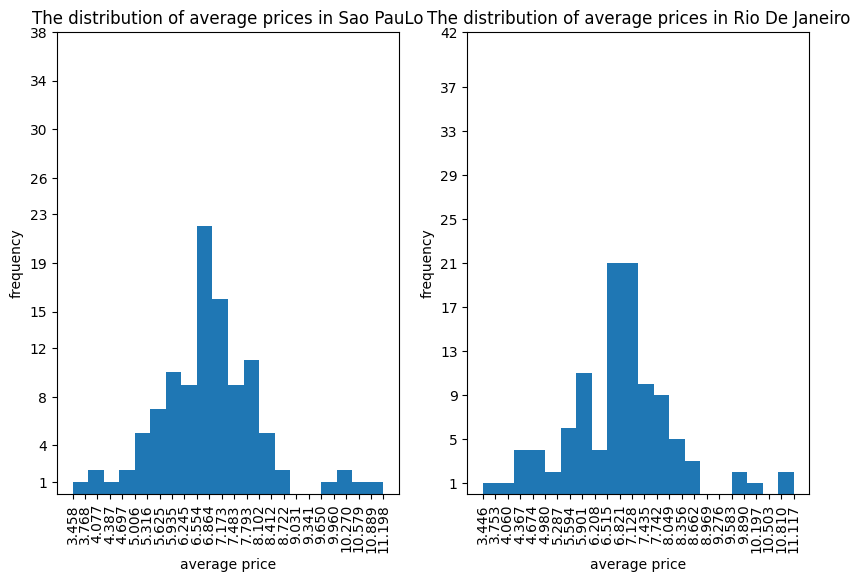

In [13]:
import src.sellers_analysis as sa
# perform the calculations needed for the pair of states (SP, RJ) , (SP, MG), (RJ, MG)
sp_rj_average_product_price = sa.average_product_price_by_state(multi_seller_orders_df=multi_seller_orders,
                                                                state1="SP", 
                                                                state2="RJ")
import importlib
# let's plot the distribution
importlib.reload(sa)
sp_ap, rj_ap = sp_rj_average_product_price['SP'], sp_rj_average_product_price['RJ'] 
sa.display_average_price_distribution(sp_ap, rj_ap, state1='Sao PauLo', state2='Rio De Janeiro', log_scale=True)

p value of the normality test for the 'average product prices in Sao Paulo (log scale)' is : [0.3734954596888743]


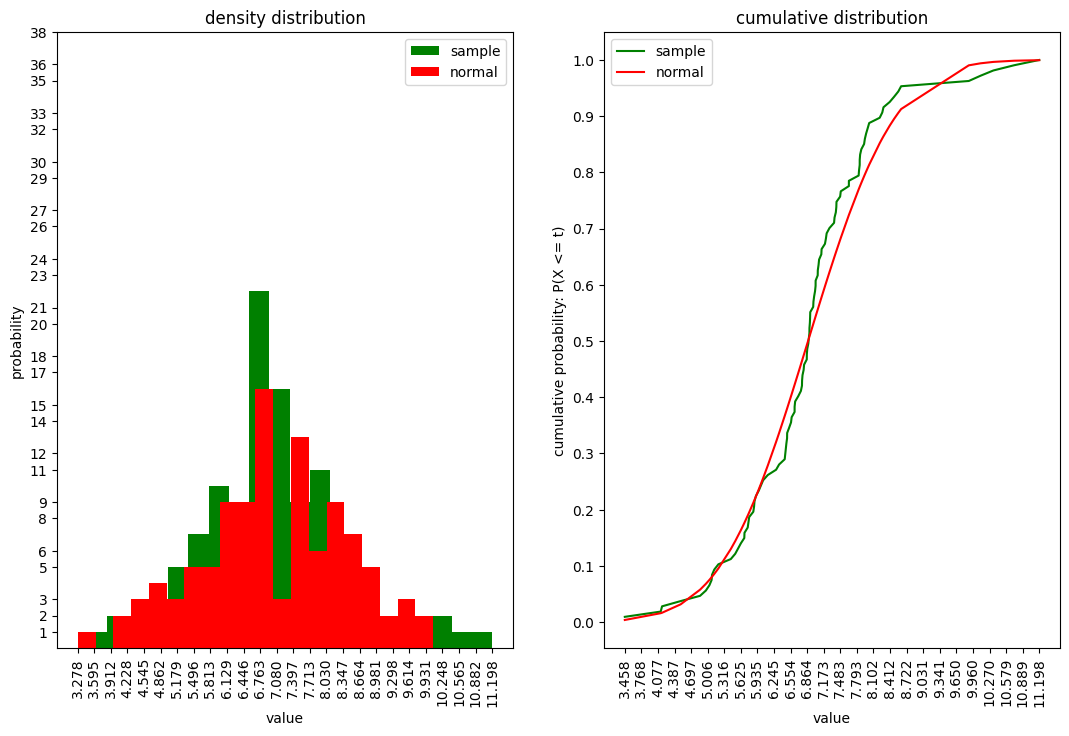

In [21]:
import src.stats_utils as su
import numpy as np
importlib.reload(su)
sp_normal_p = su.test_sample_normal_distribution(sample=np.log2(sp_ap), display=True) 
print(f"p value of the normality test for the 'average product prices in Sao Paulo (log scale)' is : {sp_normal_p}")

p value of the normality test for the 'average product prices in Rio De Janeiro (log scale)' is : [0.13131620935236876]


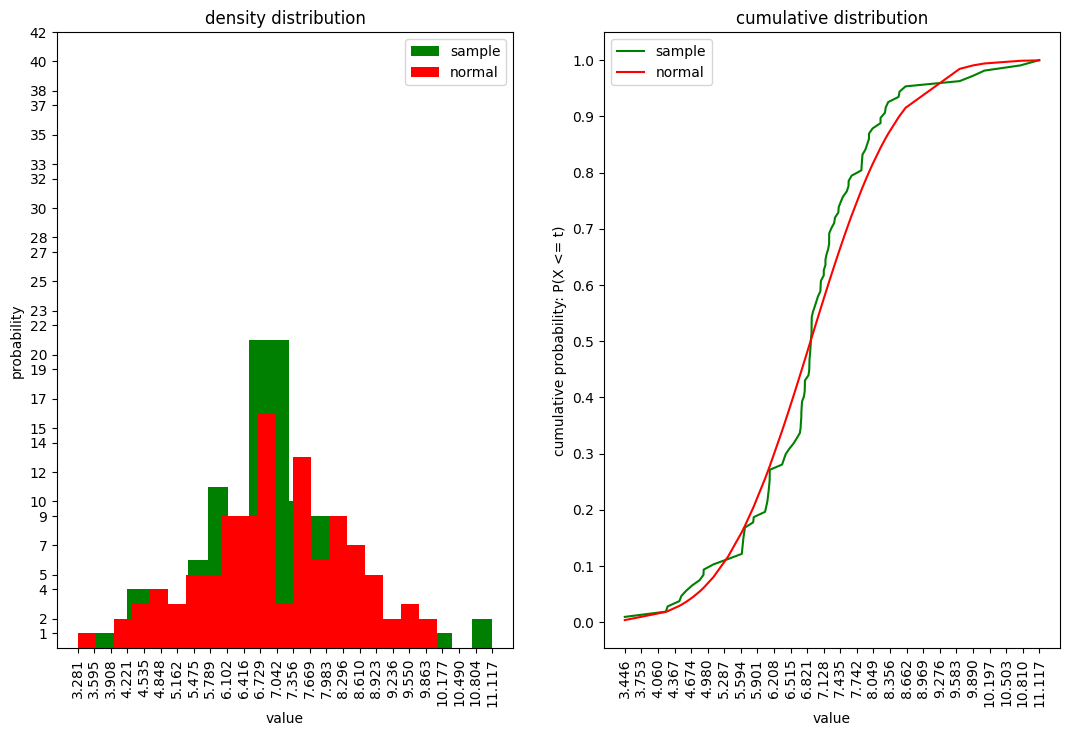

In [22]:
rj_normal_p = su.test_sample_normal_distribution(sample=np.log2(rj_ap), display=True) 
print(f"p value of the normality test for the 'average product prices in Rio De Janeiro (log scale)' is : {rj_normal_p}")

In [20]:
# we will assume that standard deviation is equal between the 2 samples
from scipy.stats import ttest_rel 
ttest_rel(a=sp_ap, b=rj_ap)

TtestResult(statistic=0.7801612923486614, pvalue=0.4370345634147691, df=106)

## Direction Conclusion
According to the t-test for paired observations, the p-value is 0.43, thus we cannot reject the null hypothesis and we can reasonably assure a customer that for a given product, the price will be (on average) the same, whether the seller is located in Sau Paulo or Rio De Janeiro

# Direction 4: Delivery Time

What factors influence delivery time.
Delivery time: time taken from the moment of the order until the customer receives the product.

We wanted to test a trivial factor, that is the location of the seller based on the state.

First let us check the average delivery time of all sellers.

In [2]:
# Load data amd modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from pathlib import Path
home = os.getcwd()
current = home
while 'mid' not in os.listdir(current):
    current = Path(current).parent
DATA_FOLDER = os.path.join(current, 'mid')

sellers = pd.read_csv(os.path.join(DATA_FOLDER, 'olist_sellers_dataset.csv'))
order_items = pd.read_csv(os.path.join(DATA_FOLDER, 'order_item_top_products.csv'))
orders = pd.read_csv(os.path.join(DATA_FOLDER, 'olist_orders_dataset.csv'))

# merge datasets
merged_data = pd.merge(sellers, order_items, on='seller_id')
merged_data = pd.merge(merged_data, orders, on='order_id')

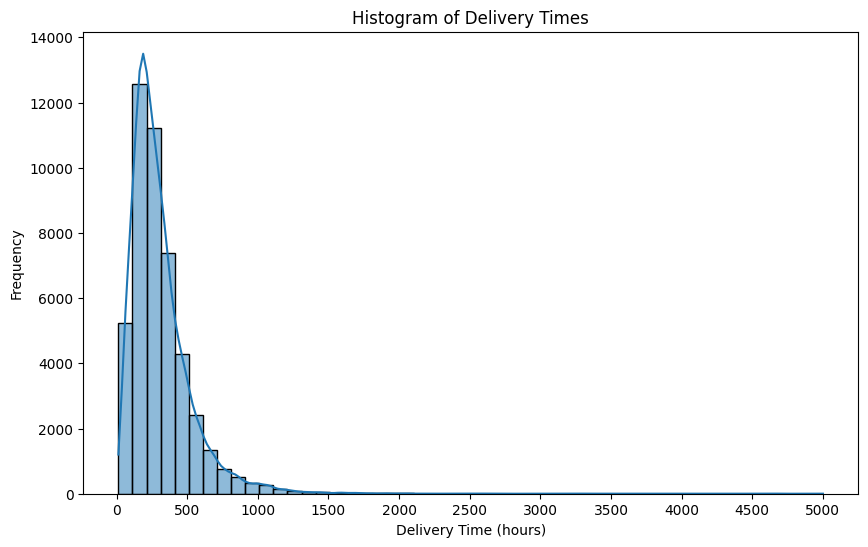

In [3]:
# calculate delivery time for each order
merged_data["delivery_time"] = pd.to_datetime(merged_data["order_delivered_customer_date"]) - pd.to_datetime(merged_data["order_purchase_timestamp"])
merged_data["delivery_time"] = merged_data["delivery_time"].dt.total_seconds() / 3600

# Histogram of delivery times
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['delivery_time'], bins=50, kde=True)
plt.xticks(np.arange(0, 5500, step=500))
plt.title('Histogram of Delivery Times')
plt.xlabel('Delivery Time (hours)')
plt.ylabel('Frequency')
plt.show()

 From this plot we can see that the delivery time can vary from 100 hours to even 1500 hours. With 200 hours being the most frequent average delivery time.

Now let us take a look at the average delivery time in different states. 

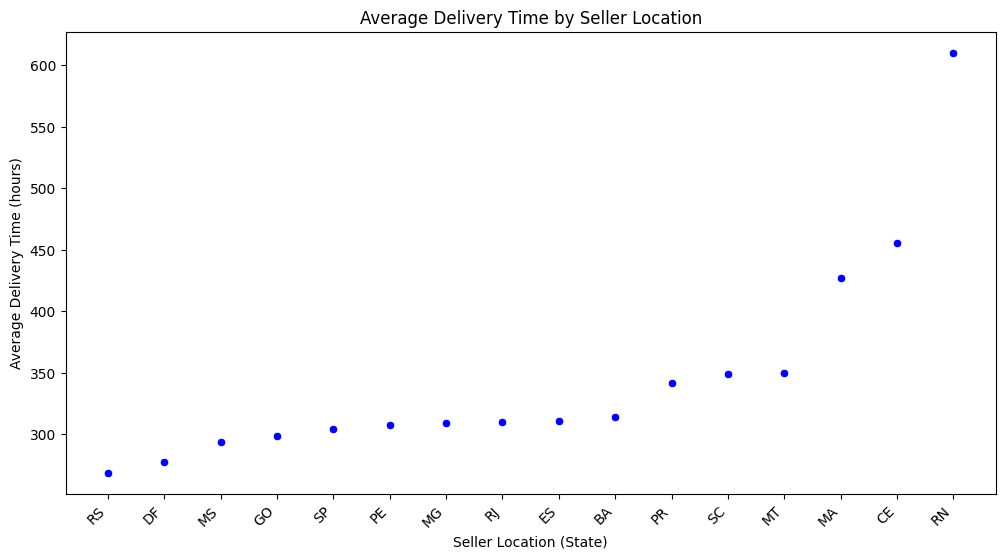

In [4]:
# Calculate the average delivery time for each seller
avg_delivery_time_by_state= merged_data.groupby('seller_state')['delivery_time'].mean().reset_index().sort_values(by="delivery_time")

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='seller_state', y='delivery_time', data=avg_delivery_time_by_state, color='blue')
plt.title('Average Delivery Time by Seller Location')
plt.xlabel('Seller Location (State)')
plt.ylabel('Average Delivery Time (hours)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

We can see that some states have a very high average delivery time compared to other states. 

To investigate this difference in delivery time, we should first find out the number of sellers of each state to make sure we have a big enough sample.

In [6]:
seller_counts = merged_data.groupby('seller_state')['seller_id'].nunique().sort_values()
seller_counts

seller_state
ES      1
MA      1
MS      1
MT      1
RN      1
CE      2
PE      2
BA      3
DF      7
GO      7
RS     19
SC     35
RJ     43
MG     63
PR     70
SP    419
Name: seller_id, dtype: int64

We can see from the data that some states only have one seller. Therefore, to get more accurate results we should only analyse states with high number of sellers. We will test the top three cities: SP, PR, and MG.

To test the hypothesis we are going to use a two-sample t_test. Therefore, we need to make sure the data is normalized.

San Paolo(SP):

[0.513549716370058]

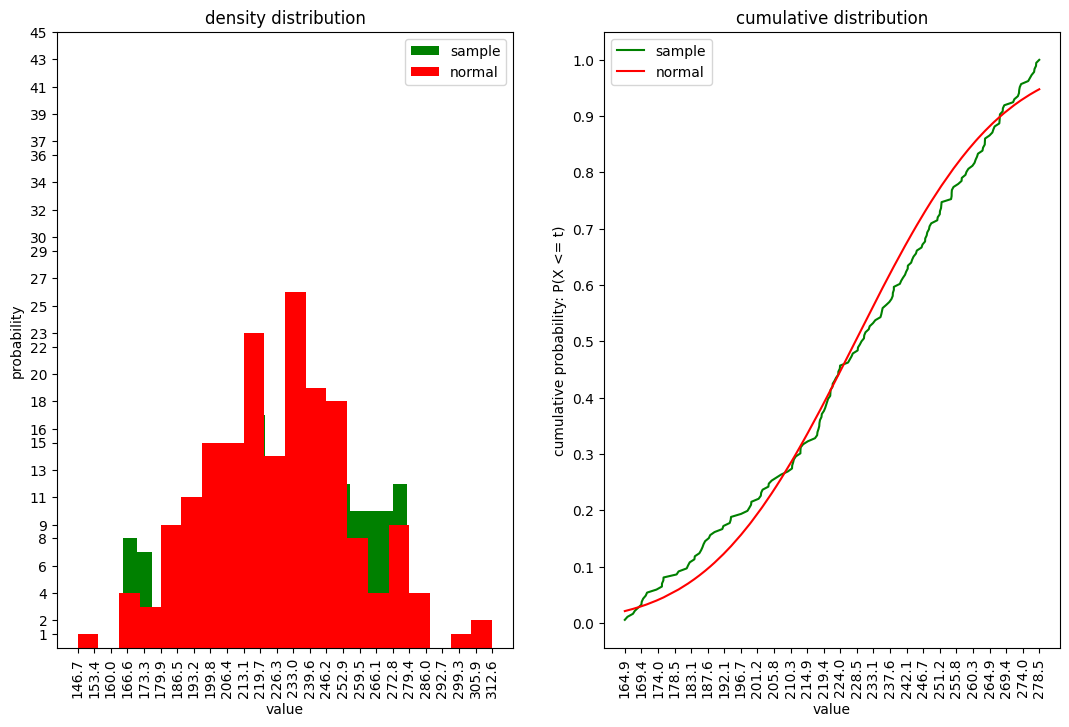

In [8]:
from src.stats_utils import remove_outliers, test_sample_normal_distribution

# load SP data
df_sp = merged_data[merged_data['seller_state'] == 'SP'].groupby('seller_id')['delivery_time'].mean().reset_index()
df_sp.rename(columns={'delivery_time': 'average_delivery_time_SP'}, inplace=True)

# remove outliers
sp_avg_dt = remove_outliers(df_sp['average_delivery_time_SP'].dropna().sort_values())
test_sample_normal_distribution(sp_avg_dt, random_state=42, display=True)

P-value > 0.05 therefore data from SP is normal

MG

[0.9532746035485491]

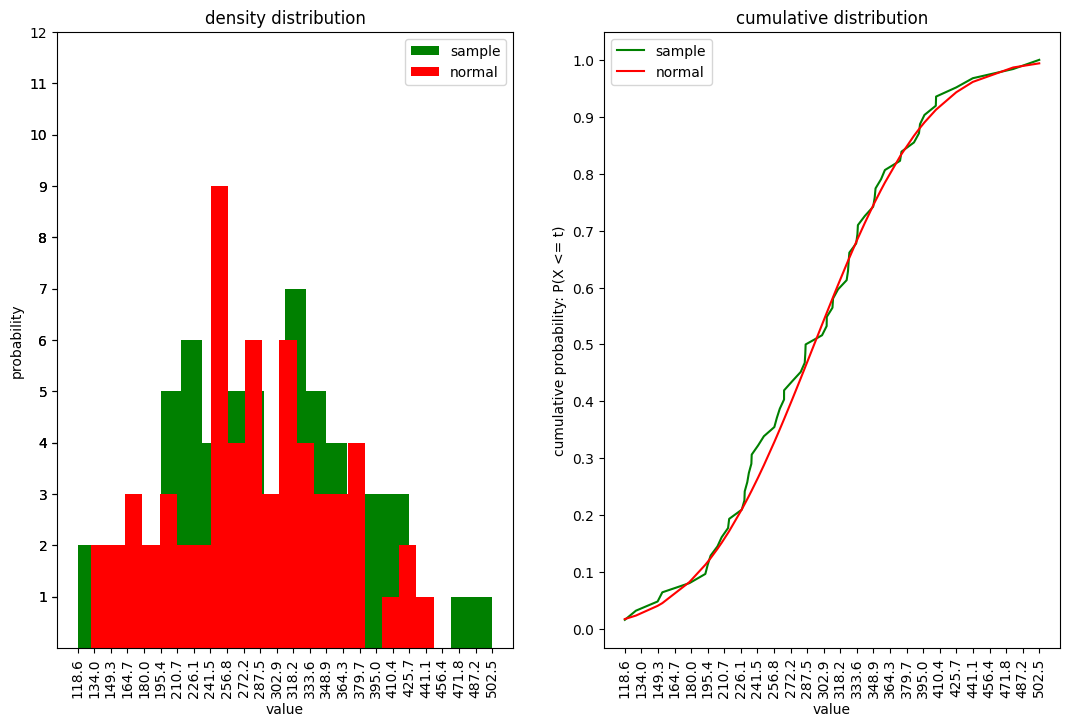

In [9]:
# Create second dataframe for sellers from state MG
df_mg = merged_data[merged_data['seller_state'] == 'MG'].groupby('seller_id')['delivery_time'].mean().reset_index()
df_mg.rename(columns={'delivery_time': 'average_delivery_time_MG'}, inplace=True)

mg_avg_dt = df_mg['average_delivery_time_MG'].dropna().sort_values()
test_sample_normal_distribution(mg_avg_dt, random_state=42, display=True)

Moreover, this data shows that for state MG the data is normal.

PR

[0.8150992093802347]

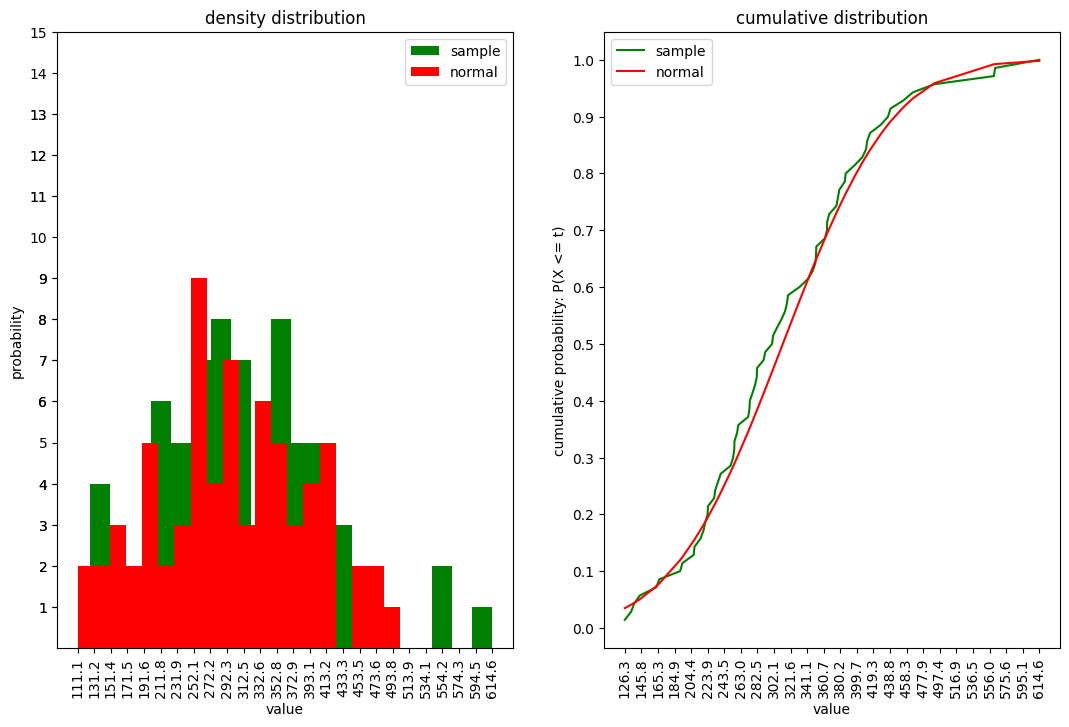

In [10]:
df_pr = merged_data[merged_data['seller_state'] == 'PR'].groupby('seller_id')['delivery_time'].mean().reset_index()
df_pr.rename(columns={'delivery_time': 'average_delivery_time_PR'}, inplace=True)

pr_avg_dt = df_pr['average_delivery_time_PR'].dropna().sort_values()
test_sample_normal_distribution(pr_avg_dt, random_state=42, display=True)

Same here, data from PR is normal.

Now we test the difference between the average delivery time in SP and PR.

In [11]:
from scipy.stats import ttest_ind

# Perform the two-sample t-test
t_statistic, p_value = ttest_ind(sp_avg_dt, pr_avg_dt, equal_var=False)

print("Two-Sample T-Test Results:")
print(f"T-Statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value > 0.05:
    print("Fail to reject the null hypothesis. There is no significant difference between the means.")
else:
    print("Reject the null hypothesis. There is a significant difference between the means.")

Two-Sample T-Test Results:
T-Statistic: -6.706006605807289
P-value: 3.4996165163188173e-09
Reject the null hypothesis. There is a significant difference between the means.


Conclusion: Our hypothesis shows that there is a significant difference between the average delivery time in SP and PR.

Now we test the difference between the average delivery time in PR and MG.

In [12]:
from scipy.stats import ttest_ind

# Perform the two-sample t-test
t_statistic, p_value = ttest_ind(pr_avg_dt, mg_avg_dt, equal_var=False)

print("Two-Sample T-Test Results:")
print(f"T-Statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value > 0.05:
    print("Fail to reject the null hypothesis. There is no significant difference between the means.")
else:
    print("Reject the null hypothesis. There is a significant difference between the means.")

Two-Sample T-Test Results:
T-Statistic: 1.1271928469471948
P-value: 0.26175270745994694
Fail to reject the null hypothesis. There is no significant difference between the means.


Conclusion: Our hypothesis here shows that there is no significant difference between the average delivery time in MG and PR.